In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from prep import prep_store_data, prep_germany_power_data

In [3]:
df = prep_store_data()

In [30]:
df = df.resample('D').sum()
df.head()

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
sale_date,,,,,,,,,
2013-01-01 00:00:00+00:00,13696.0,227794000,2750,39112400,12750,2580.2,119234392245520,119234392245520,73844.01
2013-01-02 00:00:00+00:00,13678.0,227794500,2750,39112400,12750,2580.2,119234392245520,119234392245520,73570.58
2013-01-03 00:00:00+00:00,14488.0,227795000,2750,39112400,12750,2580.2,119234392245520,119234392245520,78169.48
2013-01-04 00:00:00+00:00,15677.0,227795500,2750,39112400,12750,2580.2,119234392245520,119234392245520,84467.73
2013-01-05 00:00:00+00:00,16237.0,227796000,2750,39112400,12750,2580.2,119234392245520,119234392245520,87621.85


In [31]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

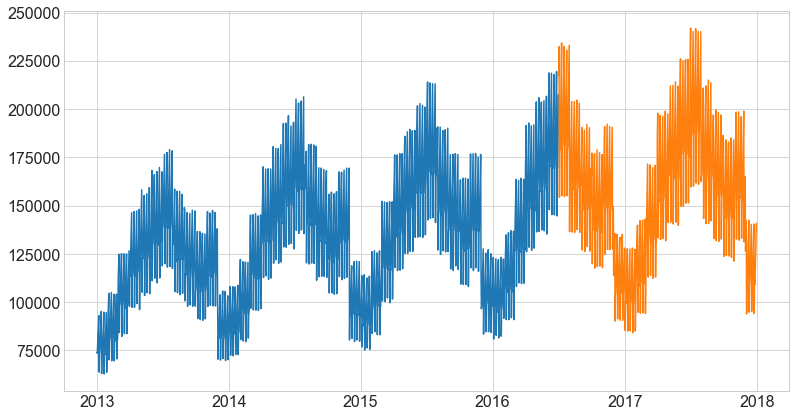

In [32]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

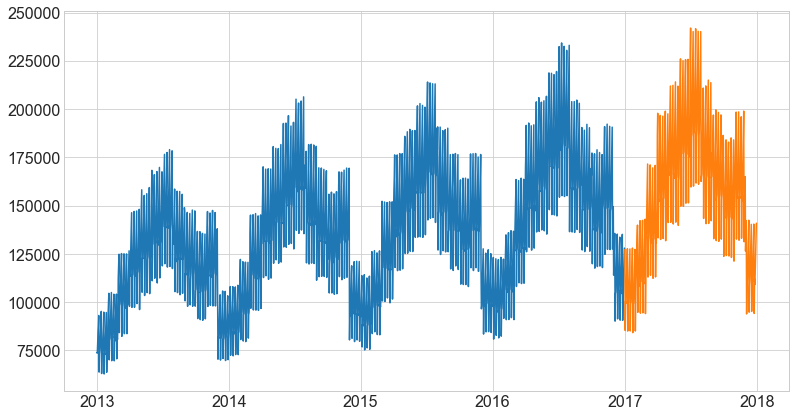

In [33]:
train = df[:'2016']
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [34]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

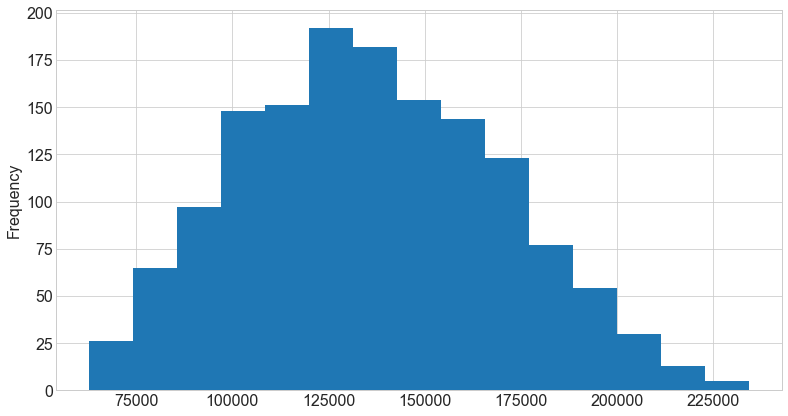

In [35]:
y.plot.hist(bins=15)

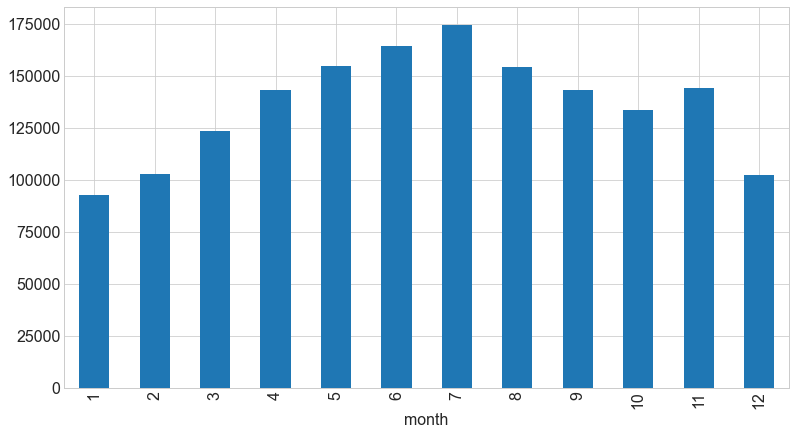

In [36]:
train['month'] = train.index.month

train.groupby('month').sales_total.mean().plot.bar()

In [37]:
sns.boxplot(data=train, y='sales_total', x='day_of_week')

ValueError: Could not interpret input 'day_of_week'

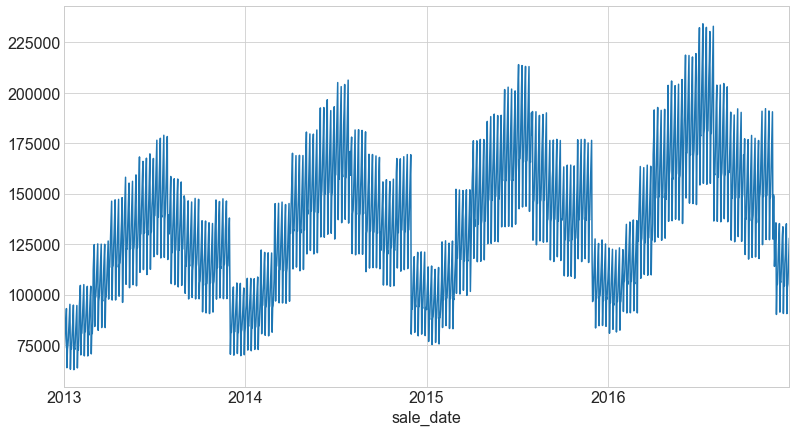

In [38]:
y.plot()

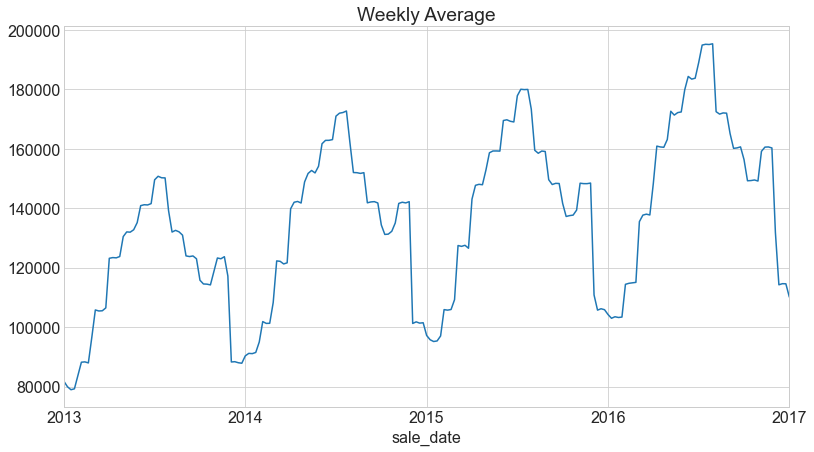

In [39]:
y.resample('W').mean().plot(title='Weekly Average')

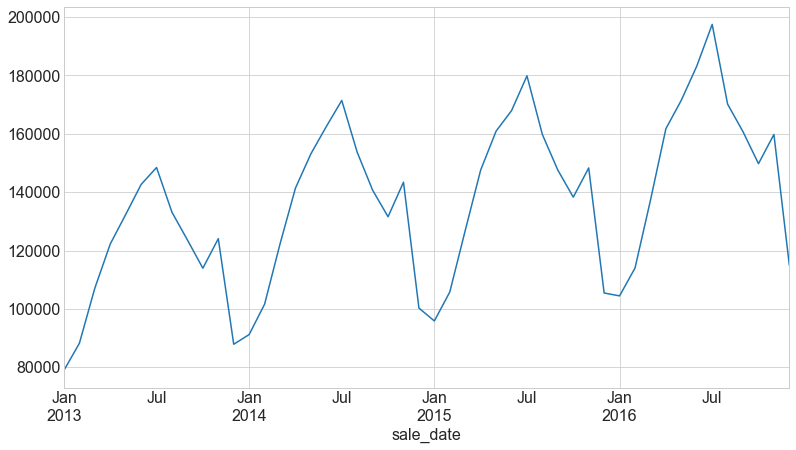

In [40]:
y.resample('M').mean().plot()

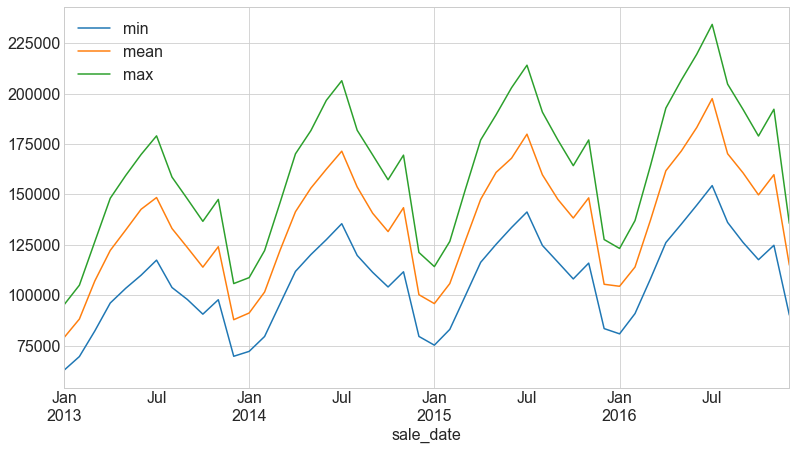

In [41]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

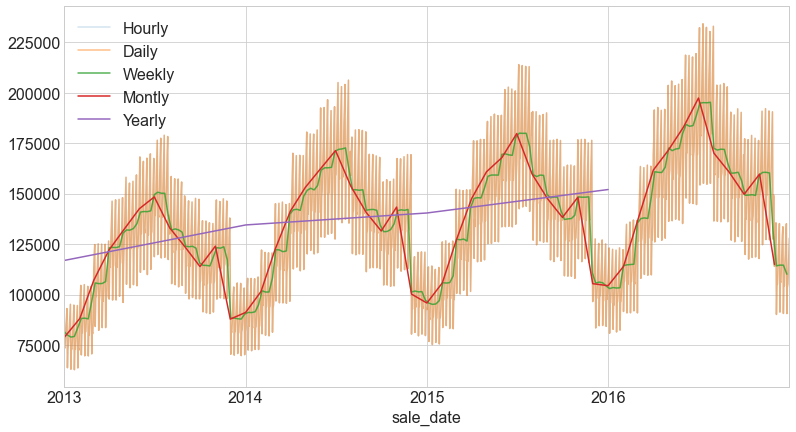

In [42]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()